## Atherosclerotic Heart Disease 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
heart = pd.read_csv('../data/Heart.csv')
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
def yes_no(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

heart.AHD.apply(yes_no).head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [4]:
heart['ahd_num'] = heart.AHD.apply(yes_no)

In [5]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


# Ignore all that's below. I left it stricly for the curious

In [6]:
def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


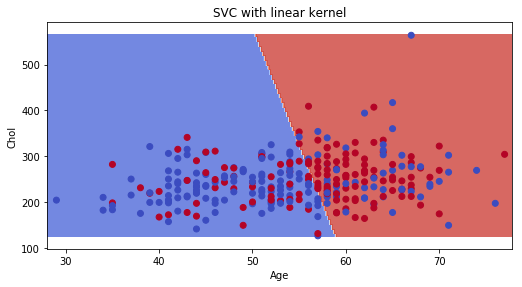

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

col1, col2 = 'Age', 'Chol'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)


plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()


In [34]:
C=1.0
X_scaled = preprocessing.scale(X)

In [31]:
svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled, y)

In [32]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)

In [33]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)

In [28]:
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

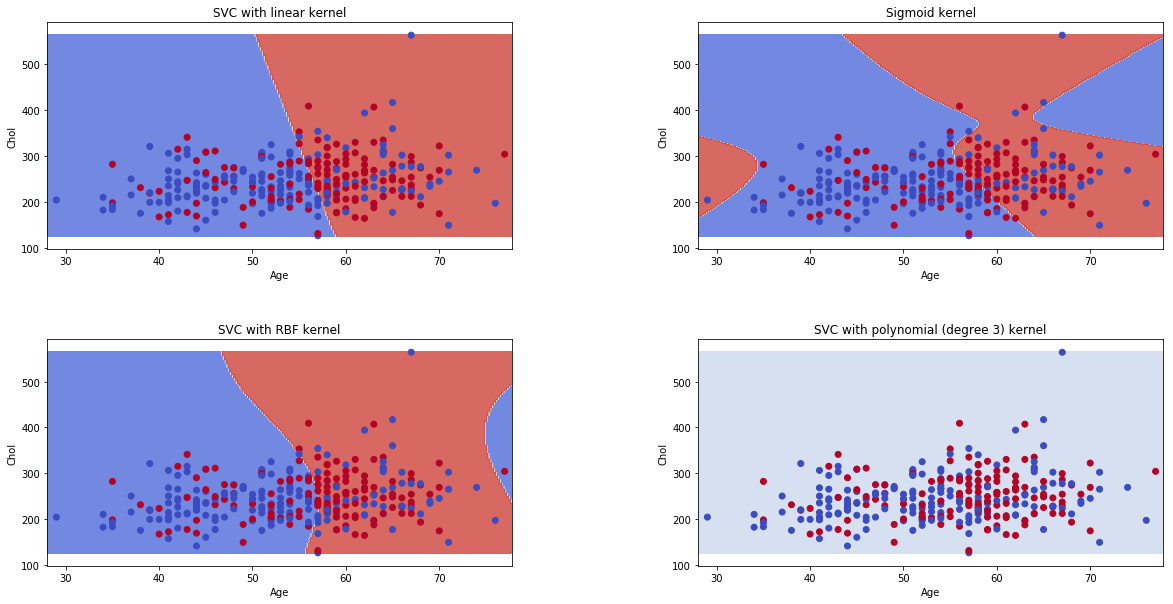

In [29]:
# title for the plots
titles = ['SVC with linear kernel',
          'Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

In [ ]:
len(heart)

In [35]:
results = dict()

In [ ]:
results['Linear'] = [12, 13, 5, 4]

In [ ]:
results_array = [] 
results_array.append({"Type":"Linear", "TP":12, "TN":13, "FP":5, "FN":4})